In [31]:
#import pandas
import pandas as pd

In [32]:
#create dataframe for the csv file ('df_comprehensive.csv'). The csv file was ulled from webscraping performed on box office mojo
df = pd.read_csv('df_comprehensive.csv',index_col = 0)

In [33]:
#show first 5 items in data frame
df.head()

,title,rank,lifetime_gross,overall_rank,year,id,MPAA,adult,budget,genres,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,Toy Story 4,1,"$434,038,008",24,2019,tt1979376,G,False,175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt1979376,en,Toy Story 4,34.489,2019-06-19,1073394593,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.6,5029
1,The Lion King,2,"$422,783,777",28,1994,tt0110357,G,False,45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",tt0110357,en,The Lion King,32.284,1994-05-07,987483777,89,"[{'iso_639_1': 'en', 'name': 'English'}]",8.3,12393
2,Toy Story 3,3,"$415,004,880",30,2010,tt0435761,G,False,200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",tt0435761,en,Toy Story 3,27.214,2010-06-16,1066969703,103,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.8,10168
3,Finding Nemo,4,"$380,843,261",43,2003,tt0266543,G,False,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",tt0266543,en,Finding Nemo,34.417,2003-05-30,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.8,13547
4,"Monsters, Inc.",5,"$289,916,256",101,2001,tt0198781,G,False,115000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0198781,en,"Monsters, Inc.",41.313,2001-11-01,562816256,92,"[{'iso_639_1': 'en', 'name': 'English'}]",7.8,12668


In [34]:
#review columns, data types and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3361 entries, 0 to 3360
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3361 non-null   object 
 1   rank               3361 non-null   object 
 2   lifetime_gross     3361 non-null   object 
 3   overall_rank       3361 non-null   object 
 4   year               3361 non-null   object 
 5   id                 3361 non-null   object 
 6   MPAA               3361 non-null   object 
 7   adult              3361 non-null   bool   
 8   budget             3361 non-null   int64  
 9   genres             3361 non-null   object 
 10  imdb_id            3361 non-null   object 
 11  original_language  3361 non-null   object 
 12  original_title     3361 non-null   object 
 13  popularity         3361 non-null   float64
 14  release_date       3361 non-null   object 
 15  revenue            3361 non-null   int64  
 16  runtime            3361 

In [35]:
#remove $ sign and convert lifetime_gross from an object to an integer
df[df.columns[2:3]] = df[df.columns[2:3]].replace('[\$,]', '', regex=True).astype(int)

In [36]:
#confirm that changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3361 entries, 0 to 3360
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3361 non-null   object 
 1   rank               3361 non-null   object 
 2   lifetime_gross     3361 non-null   int64  
 3   overall_rank       3361 non-null   object 
 4   year               3361 non-null   object 
 5   id                 3361 non-null   object 
 6   MPAA               3361 non-null   object 
 7   adult              3361 non-null   bool   
 8   budget             3361 non-null   int64  
 9   genres             3361 non-null   object 
 10  imdb_id            3361 non-null   object 
 11  original_language  3361 non-null   object 
 12  original_title     3361 non-null   object 
 13  popularity         3361 non-null   float64
 14  release_date       3361 non-null   object 
 15  revenue            3361 non-null   int64  
 16  runtime            3361 

In [37]:
#create column for net profit (revenue - budget)
df['net_profit'] = df['revenue'] - df['budget']

In [38]:
#create column for net profit by millions since it is easier to read
df['net_profit_by_millions'] = df['net_profit'].map(lambda x: x/1000000)
df.head()

,title,rank,lifetime_gross,overall_rank,year,id,MPAA,adult,budget,genres,...,original_title,popularity,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,net_profit,net_profit_by_millions
0,Toy Story 4,1,434038008,24,2019,tt1979376,G,False,175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",...,Toy Story 4,34.489,2019-06-19,1073394593,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.6,5029,898394593,898.394593
1,The Lion King,2,422783777,28,1994,tt0110357,G,False,45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",...,The Lion King,32.284,1994-05-07,987483777,89,"[{'iso_639_1': 'en', 'name': 'English'}]",8.3,12393,942483777,942.483777
2,Toy Story 3,3,415004880,30,2010,tt0435761,G,False,200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",...,Toy Story 3,27.214,2010-06-16,1066969703,103,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.8,10168,866969703,866.969703
3,Finding Nemo,4,380843261,43,2003,tt0266543,G,False,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",...,Finding Nemo,34.417,2003-05-30,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.8,13547,846335536,846.335536
4,"Monsters, Inc.",5,289916256,101,2001,tt0198781,G,False,115000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,"Monsters, Inc.",41.313,2001-11-01,562816256,92,"[{'iso_639_1': 'en', 'name': 'English'}]",7.8,12668,447816256,447.816256


In [39]:
#import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Net Profit per MPAA Rating')

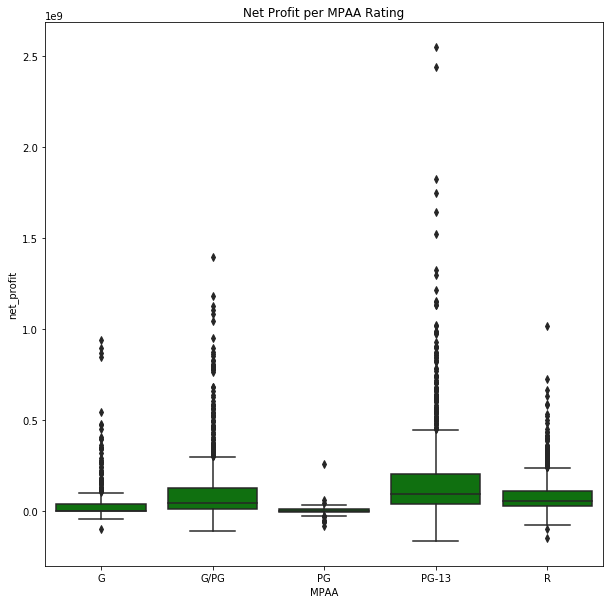

In [41]:
#create boxplot for net profit per MPAA rating
plt.figure(figsize=(10,10))
sns.boxplot(
    data= df,
    x='MPAA',
    y='net_profit',
    color='green').set_title('Net Profit per MPAA Rating')


In [42]:
#since the boxplot does not do a great job of displaying data, work on creating bar chart. 
#Do groupby function to seperate the movies by MPAA rating and get the mean net profit per MPAA rating. 
#Remove the PG rated movies since they are mostly grouped in the G/PG rating.
rating_df = df.groupby('MPAA').mean()
mpaa_df = rating_df.drop(['PG'])
mpaa_df

,lifetime_gross,adult,budget,popularity,revenue,runtime,vote_average,vote_count,net_profit,net_profit_by_millions
MPAA,,,,,,,,,,
G,3.935816e+07,False,1.759237e+07,10.146612,6.985169e+07,92.448753,6.521053,1027.700831,5.225933e+07,52.259328
G/PG,7.928661e+07,False,4.251758e+07,14.112203,1.518734e+08,104.967819,6.415018,1724.014303,1.093559e+08,109.355852
PG-13,1.070299e+08,False,6.802820e+07,18.033418,2.412832e+08,114.676000,6.457000,3353.681000,1.732550e+08,173.255002
R,6.599044e+07,False,3.406738e+07,16.139989,1.203162e+08,114.721000,6.639100,2446.309000,8.624878e+07,86.248778


In [43]:
#set x index
x = mpaa_df.index

In [44]:
#set y index
y = mpaa_df['net_profit_by_millions']

<BarContainer object of 4 artists>

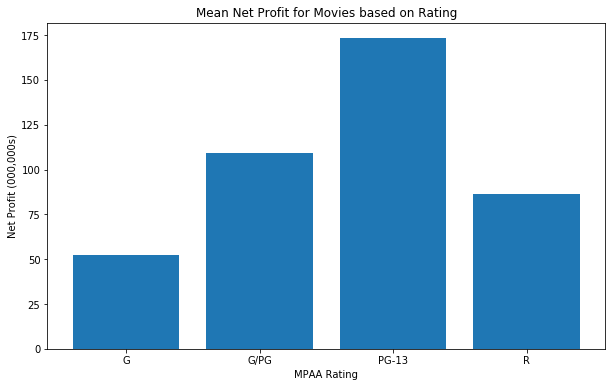

In [45]:
#plot bar chart
plt.figure(figsize = (10, 6))
plt.xlabel('MPAA Rating')
plt.ylabel('Net Profit (000,000s)')
plt.title('Mean Net Profit for Movies based on Rating')
plt.bar(x, y)